In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
import pickle

In [99]:
OBJECTIVE = "OBJECTIVE"
INEQUALITY_CONSTRAINT_ONE = "INEQUALITY_CONSTRAINT_ONE"
INEQUALITY_CONSTRAINT_TWO = "INEQUALITY_CONSTRAINT_TWO"
EQUALITY_CONSTRAINT_ONE = "EQUALITY_CONSTRAINT_ONE"
EQUALITY_CONSTRAINT_TWO = "EQUALITY_CONSTRAINT_TWO"

In [98]:
def process_ts_lsq_results(result_dir: str,
                           num_runs: int,
                           failure_val: float):
    all_results = []
    for run in range(num_runs):
        run_file = result_dir + f"run_{run}_data.pkl"
        with open(run_file, "rb") as fp:
            run_data = pickle.load(fp)
        inequality_constraint_one_satisfied = run_data[INEQUALITY_CONSTRAINT_ONE].observations.numpy().squeeze() <= 0
        inequality_constraint_two_satisfied = run_data[INEQUALITY_CONSTRAINT_TWO].observations.numpy().squeeze() <= 0
        satisfied_mask = np.logical_and(inequality_constraint_one_satisfied, inequality_constraint_two_satisfied)
        failure_mask = np.logical_not(satisfied_mask)
        objective_vals = run_data[OBJECTIVE].observations.numpy().squeeze()
        safe_obs_values = objective_vals.copy()
        safe_obs_values[failure_mask] = failure_val
        all_results.append(np.minimum.accumulate(safe_obs_values))
    all_results = np.array(all_results)
    all_results_mean = np.mean(all_results, axis=0)
    all_results_median = np.median(all_results, axis=0)
    all_results_std = np.std(all_results, axis=0)
    return all_results, all_results_mean, all_results_median, all_results_std

In [102]:
def process_ts_gsbp_results(result_dir: str,
                            num_runs: int,
                            failure_val: float,
                            equality_tolerance: float):
    all_results = []
    for run in range(num_runs):
        run_file = result_dir + f"run_{run}_data.pkl"
        with open(run_file, "rb") as fp:
            run_data = pickle.load(fp)
        inequality_constraint_one_satisfied = run_data[INEQUALITY_CONSTRAINT_ONE].observations.numpy().squeeze() <= 0
        equality_constraint_one_satisfied = np.abs(run_data[EQUALITY_CONSTRAINT_ONE].observations.numpy().squeeze()) <= equality_tolerance
        equality_constraint_two_satisfied = np.abs(run_data[EQUALITY_CONSTRAINT_TWO].observations.numpy().squeeze()) <= equality_tolerance
        satisfied_mask = np.logical_and(inequality_constraint_one_satisfied, equality_constraint_one_satisfied)
        satisfied_mask = np.logical_and(satisfied_mask, equality_constraint_two_satisfied)
        failure_mask = np.logical_not(satisfied_mask)
        objective_vals = run_data[OBJECTIVE].observations.numpy().squeeze()
        safe_obs_values = objective_vals.copy()
        safe_obs_values[failure_mask] = failure_val
        all_results.append(np.minimum.accumulate(safe_obs_values))
    all_results = np.array(all_results)
    all_results = np.where(all_results < -0.5, -0.5273951, all_results)
    all_results_mean = np.mean(all_results, axis=0)
    all_results_median = np.median(all_results, axis=0)
    all_results_std = np.std(all_results, axis=0)
    return all_results, all_results_mean, all_results_median, all_results_std

In [103]:
def process_original_albo_lsq_results(result_dir: str,
                                      num_runs: int,
                                      failure_val: float):
    all_results = []
    for run in range(1, num_runs + 1):
        run_file = result_dir + f"run_{run}_results.json"
        with open(run_file, "rb") as fp:
            all_run_data = json.load(fp)
            run_results = all_run_data["prog"]
            i = 0
            while run_results[i] == "Inf":
                i += 1
            if i > 0:
                for j in range(i):
                    run_results[j] = failure_val
            all_results.append(run_results)
    all_results = np.array(all_results)
    all_results_mean = np.mean(all_results, axis=0)
    all_results_median = np.median(all_results, axis=0)
    all_results_std = np.std(all_results, axis=0)
    return all_results, all_results_mean, all_results_median, all_results_std

In [104]:
def process_original_albo_gsbp_results(result_dir: str,
                                       num_runs: int,
                                       failure_val: float):
    all_results = []
    for run in range(1, num_runs + 1):
        run_file = result_dir + f"run_{run}_results.json"
        with open(run_file, "rb") as fp:
            all_run_data = json.load(fp)
            run_results = all_run_data["prog"]
            i = 0
            while run_results[i] == "Inf":
                i += 1
            if i > 0:
                for j in range(i):
                    run_results[j] = failure_val
            all_results.append(run_results)
    all_results = np.array(all_results)
    all_results = np.where(all_results < -0.5, -0.5273951, all_results)
    all_results_mean = np.mean(all_results, axis=0)
    all_results_median = np.median(all_results, axis=0)
    all_results_std = np.std(all_results, axis=0)
    return all_results, all_results_mean, all_results_median, all_results_std

### LSQ

In [101]:
ts_al_kkt_lsq_results, ts_al_kkt_lsq_results_mean, ts_al_kkt_lsq_results_median, ts_al_kkt_lsq_results_std = process_ts_lsq_results("../results/04-04-23/lsq/al_kkt_update/data/", 100, 1.3)
ts_al_original_lsq_results, ts_al_original_lsq_results_mean, ts_al_original_lsq_results_median, ts_al_original_lsq_results_std = process_ts_lsq_results("../results/04-04-23/lsq/al_original_update/data/", 100, 1.3)
original_albo_lsq_results, original_albo_lsq_results_mean, original_albo_lsq_results_median, original_albo_lsq_results_std = process_original_albo_lsq_results("../results/original_albo/lsq/slack_al_optim_correct_rho_update_urate_one/data/", 100, 1.3)
random_lsq_results, random_lsq_results_mean, random_lsq_results_median, random_lsq_results_std = process_ts_lsq_results("../results/11-04-23/lsq_random/", 100, 1.3)

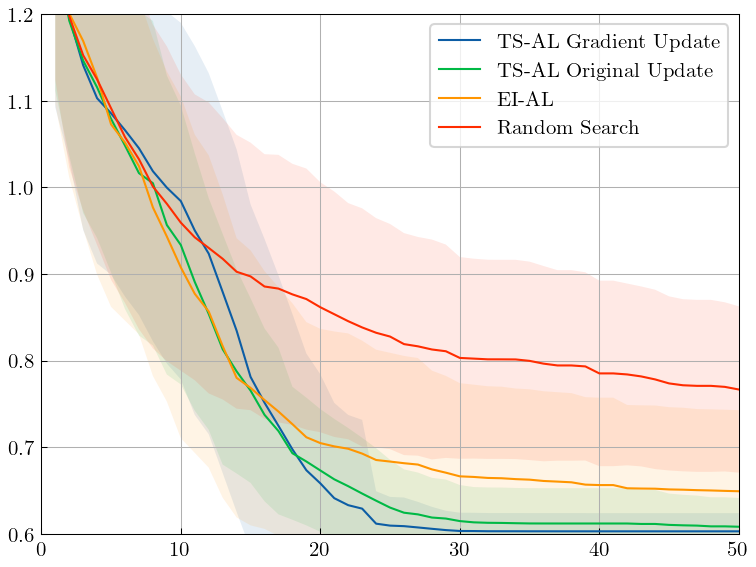

In [97]:
plt.style.use('plot_style.txt')
plt.figure(figsize=(6, 4.5))
iters = [i for i in range(1, 51)]
plt.plot(iters, ts_al_kkt_lsq_results_mean[:50], label="TS-AL Gradient Update")
plt.plot(iters, ts_al_original_lsq_results_mean[:50], label="TS-AL Original Update")
plt.plot(iters, original_albo_lsq_results_mean, label="EI-AL")
plt.plot(iters, random_lsq_results_mean[:50], label="Random Search")
plt.fill_between(iters, ts_al_kkt_lsq_results_mean[:50]+ts_al_kkt_lsq_results_std[:50], ts_al_kkt_lsq_results_mean[:50]-ts_al_kkt_lsq_results_std[:50], alpha=0.1, linestyle='-', linewidth=2)
plt.fill_between(iters, ts_al_original_lsq_results_mean[:50]+ts_al_original_lsq_results_std[:50], ts_al_original_lsq_results_mean[:50]-ts_al_original_lsq_results_std[:50], alpha=0.1, linestyle='-', linewidth=2)
plt.fill_between(iters, original_albo_lsq_results_mean[:50]+original_albo_lsq_results_std[:50], original_albo_lsq_results_mean[:50]-original_albo_lsq_results_std[:50], alpha=0.1, linestyle='-', linewidth=2)
plt.fill_between(iters, random_lsq_results_mean[:50]+random_lsq_results_std[:50], random_lsq_results_mean[:50]-random_lsq_results_std[:50], alpha=0.1, linestyle='-', linewidth=2)
plt.legend()
plt.xlim(0, 50)
plt.ylim(0.6, 1.2)
plt.show()

### GSBP

In [108]:
ts_al_kkt_gsbp_results, ts_al_kkt_gsbp_results_mean, ts_al_kkt_gsbp_results_median, ts_al_kkt_gsbp_results_std = process_ts_gsbp_results("../results/05-04-23/gsbp/al_kkt_update/data/", 50, 2.1, equality_tolerance=0.01)
ts_al_original_gsbp_results, ts_al_original_gsbp_results_mean, ts_al_original_gsbp_results_median, ts_al_original_gsbp_results_std = process_ts_gsbp_results("../results/05-04-23/gsbp/al_original_update/data/", 50, 2.1, equality_tolerance=0.01)
original_albo_gsbp_results, original_albo_gsbp_results_mean, original_albo_gsbp_results_median, original_albo_gsbp_results_std = process_original_albo_gsbp_results("../results/original_albo/gsbp/slack_al_optim_correct_rho_update_urate_one/data/", 50, 2.1)
random_gsbp_results, random_gsbp_results_mean, random_gsbp_results_median, random_gsbp_results_std = process_ts_gsbp_results("../results/11-04-23/gsbp_random/", 50, 2.1, equality_tolerance=0.01)

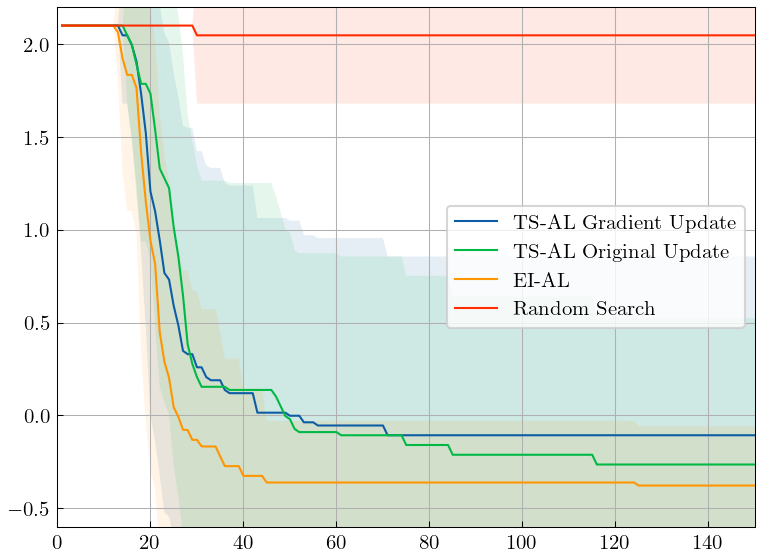

In [123]:
plt.style.use('plot_style.txt')
plt.figure(figsize=(6, 4.5))
iters = [i for i in range(1, 151)]
plt.plot(iters, ts_al_kkt_gsbp_results_mean[:150], label="TS-AL Gradient Update")
plt.plot(iters, ts_al_original_gsbp_results_mean[:150], label="TS-AL Original Update")
plt.plot(iters, original_albo_gsbp_results_mean, label="EI-AL")
plt.plot(iters, random_gsbp_results_mean[:150], label="Random Search")
plt.fill_between(iters, ts_al_kkt_gsbp_results_mean[:150]+ts_al_kkt_gsbp_results_std[:150], ts_al_kkt_gsbp_results_mean[:150]-ts_al_kkt_gsbp_results_std[:150], alpha=0.1, linestyle='-', linewidth=2)
plt.fill_between(iters, ts_al_original_gsbp_results_mean[:150]+ts_al_original_gsbp_results_std[:150], ts_al_original_gsbp_results_mean[:150]-ts_al_original_gsbp_results_std[:150], alpha=0.1, linestyle='-', linewidth=2)
plt.fill_between(iters, original_albo_gsbp_results_mean[:150]+original_albo_gsbp_results_std[:150], original_albo_gsbp_results_mean[:150]-original_albo_gsbp_results_std[:150], alpha=0.1, linestyle='-', linewidth=2)
plt.fill_between(iters, random_gsbp_results_mean[:150]+random_gsbp_results_std[:150], random_gsbp_results_mean[:150]-random_gsbp_results_std[:150], alpha=0.1, linestyle='-', linewidth=2)
plt.legend()
plt.xlim(0, 150)
plt.ylim(-0.6, 2.2)
plt.show()

In [167]:
run = 26
with open(f"../results/05-04-23/gsbp/al_original_update/data/run_{run}_data.pkl", "rb") as fp:
    data = pickle.load(fp)
data["OBJECTIVE"].query_points[:10]

<tf.Tensor: shape=(10, 2), dtype=float64, numpy=
array([[0.65062058, 0.23672309],
       [0.13210708, 0.59205994],
       [0.59676325, 0.00981244],
       [0.06743639, 0.41250731],
       [0.96200489, 0.13931285],
       [0.33516351, 0.16665507],
       [0.73143159, 0.80984831],
       [0.23665159, 0.40800009],
       [0.67895293, 0.70223735],
       [0.64627307, 0.37090931]])>

In [165]:
print(ts_al_original_gsbp_results[:,-1])

[-0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951
 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951
 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951
 -0.5273951 -0.5273951  2.1       -0.5273951 -0.5273951 -0.5273951
 -0.5273951 -0.5273951 -0.5273951  2.1       -0.5273951 -0.5273951
  2.1       -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951
 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951
 -0.5273951  2.1       -0.5273951 -0.5273951  2.1       -0.5273951
 -0.5273951 -0.5273951]


In [160]:
print(original_albo_gsbp_results[:,-100])

[-0.5273951  -0.5273951  -0.5273951  -0.5273951  -0.5273951  -0.5273951
 -0.5273951  -0.5273951  -0.5273951  -0.5273951  -0.5273951   0.31824271
 -0.5273951   0.29696942 -0.5273951  -0.5273951  -0.5273951  -0.5273951
 -0.5273951  -0.5273951  -0.5273951  -0.5273951  -0.5273951  -0.5273951
 -0.5273951  -0.5273951   0.28881867 -0.5273951   0.29571856  0.31928504
 -0.5273951  -0.5273951  -0.5273951  -0.5273951  -0.5273951  -0.5273951
 -0.5273951  -0.5273951  -0.5273951  -0.5273951  -0.5273951   0.2906346
 -0.5273951  -0.5273951   0.29479246  0.31416716 -0.5273951   0.30049195
 -0.5273951   0.29887258]
